## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import stopwords #for stopwords
import string #for punctuation
from nltk.stem.porter import PorterStemmer #for stemming
from wordcloud import WordCloud

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

## Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#dropping last 3 columns
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis =1 ,inplace = True)

In [8]:
#renaming the columns
data.rename(columns = {"v1": "result","v2":"text"},inplace = True)

In [9]:
#label encoding on result column
le = LabelEncoder()
data["result"] = le.fit_transform(data["result"])

In [10]:
#missing values
data.isna().sum()

result    0
text      0
dtype: int64

In [11]:
#check for duplicate values
data.duplicated().sum()

403

In [12]:
#remove duplicates
data = data.drop_duplicates(keep= "first")

In [13]:
data["result"].value_counts()

0    4516
1     653
Name: result, dtype: int64

## EDA

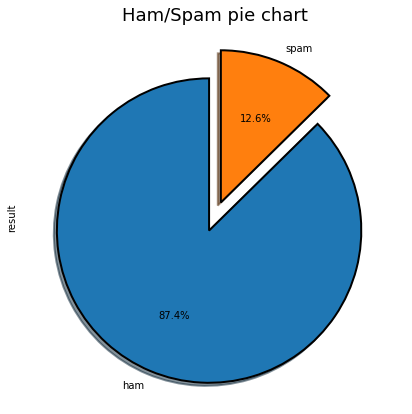

In [14]:
plt.figure(figsize = (7,7))
wp = {'linewidth':2, 'edgecolor': "black"}
explode = (0.1,0.1)
tags = data["result"].value_counts()
tags.plot(kind = "pie",autopct = '%1.1f%%',shadow = True,startangle = 90, wedgeprops = wp,
          explode = explode, labels = ["ham","spam"])
plt.title("Ham/Spam pie chart",fontsize=18)
plt.show()

Here we can see data is imbalanced.

In [15]:
#nltk dependencies
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashwini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#lenght of every text message
data["num_characters"] = data["text"].apply(len)

In [17]:
#number of words
data["num_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
#number of sentences
data["num_sentences"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
data.head()

,result,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   result          5169 non-null   int32 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [21]:
data.describe()

,result,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
#describe method for ham value only
data[data["result"]==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#describe method for spam value only
data[data["result"]==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


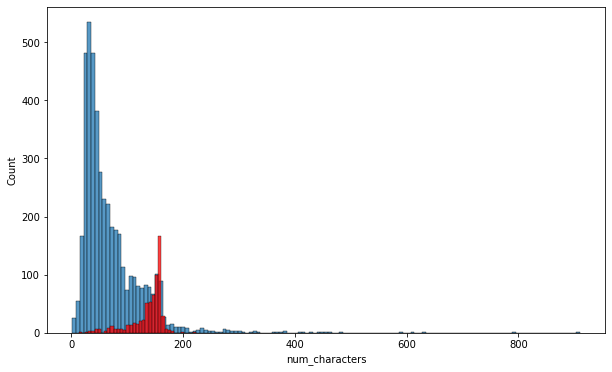

In [24]:
#histogram
plt.figure(figsize = (10,6))
sns.histplot(data[data["result"]==0]["num_characters"])
sns.histplot(data[data["result"]==1]["num_characters"],color = 'red')
plt.show()

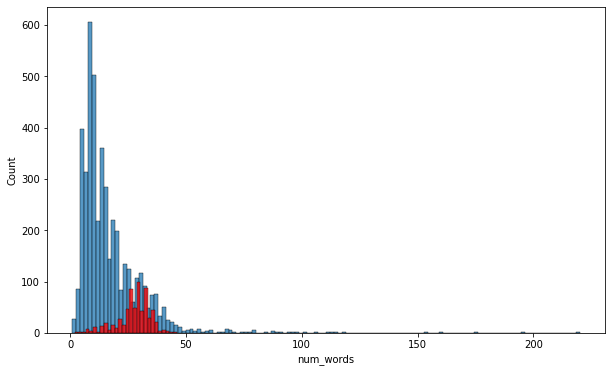

In [25]:
plt.figure(figsize = (10,6))
sns.histplot(data[data["result"]==0]["num_words"])
sns.histplot(data[data["result"]==1]["num_words"],color = 'red')
plt.show()

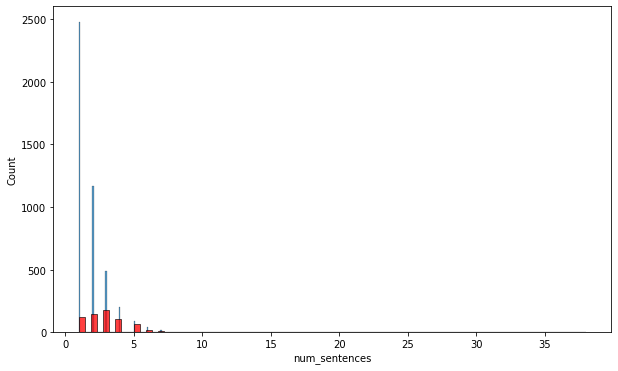

In [26]:
plt.figure(figsize = (10,6))
sns.histplot(data[data["result"]==0]["num_sentences"])
sns.histplot(data[data["result"]==1]["num_sentences"],color = 'red')
plt.show()

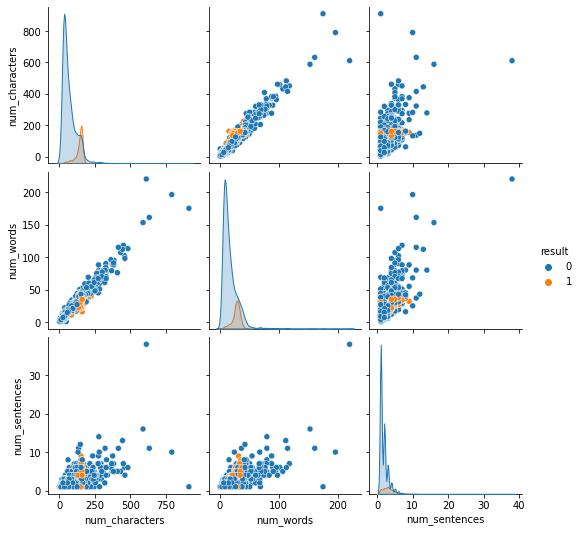

In [27]:
sns.pairplot(data,hue = "result")

<AxesSubplot: >

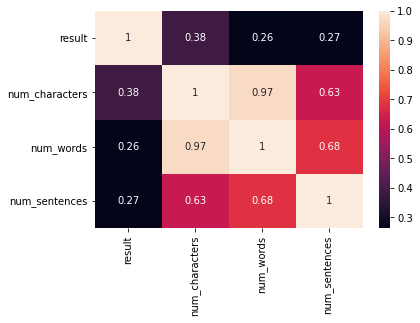

In [28]:
sns.heatmap(data.corr(),annot = True)

## Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [29]:
#stemming
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    new_text = []
    for i in text:
        if i.isalnum():
            new_text.append(i)
    text = new_text[:]
    new_text.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            new_text.append(i)
    text = new_text[:]
    new_text.clear()
    for i in text:
        new_text.append(ps.stem(i))
        
    return " ".join(new_text)

In [31]:
transform_text("Ok lar... Joking wif u oni...")

'ok lar joke wif u oni'

In [32]:
data["transformed_text"] = data["text"].apply(transform_text)

In [33]:
data.head()

,result,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
#wordcloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="black")

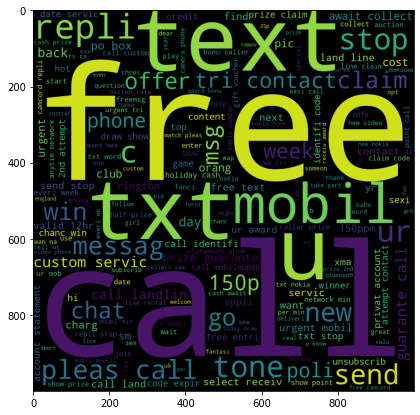

In [35]:
#wordcloud for spam
spam_wc = wc.generate(data[data["result"]==1]["transformed_text"].str.cat(sep = " "))
plt.figure(figsize = (20,7))
plt.imshow(spam_wc)

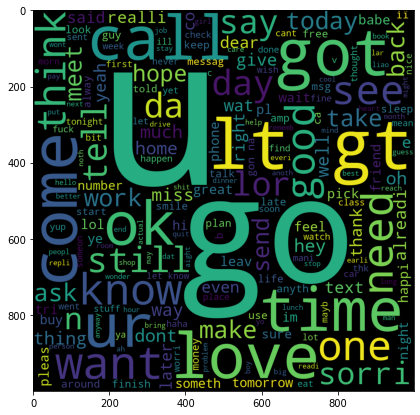

In [36]:
#wordcloud for ham
ham_wc = wc.generate(data[data["result"]==0]["transformed_text"].str.cat(sep = " "))
plt.figure(figsize = (20,7))
plt.imshow(ham_wc)

In [37]:
#Top 30 words from transformed_text
#spam
spam_corpus = []
for msg in data[data["result"]==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

In [39]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [40]:
#ham
ham_corpus= []
for msg in data[data["result"]==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

35402

In [42]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

## Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

### CountVectorizer

In [44]:
X = cv.fit_transform(data["transformed_text"]).toarray()

In [45]:
y = data["result"].values

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [48]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [49]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [50]:
#BernoulliNB
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb ))
print(confusion_matrix(y_test,y_pred_bnb ))
print(precision_score(y_test,y_pred_bnb ))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [51]:
#MultinomialNB
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


### TfidfVectorizer

In [52]:
tfid = TfidfVectorizer()

In [53]:
X = tfid.fit_transform(data["transformed_text"]).toarray()

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [55]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [56]:
#BernoulliNB
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb ))
print(confusion_matrix(y_test,y_pred_bnb ))
print(precision_score(y_test,y_pred_bnb ))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [57]:
#MultinomialNB
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


Precsion score on tfid multinomialNB is better.Creating model using TFID.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


In [63]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [64]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.959381,1.000000
4,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,AdaBoost,0.961315,0.945455
3,LR,0.951644,0.940000
9,xgb,0.970019,0.934959
8,GBDT,0.952611,0.923810
6,BgC,0.958414,0.862595
2,DT,0.936170,0.846154


## Conclusion:

1. Accuracy andd precision score of Naive byes and random forest classifier is good by using tfid vectorizer.
2. Since the data we have is imbalanced so considering precsion score is also important.
3. Proceeding with random forest classifier for model building.

## Model Importing

Importing tfid vectorizer and random forest model according to the accuracy and precision score.

In [65]:
import pickle

In [66]:
pickle.dump(tfid,open("tfid.pkl","wb"))
pickle.dump(rfc,open("rfc.pkl","wb"))